In [3]:
%load_ext autoreload
%autoreload 2

# Dependencies

In [4]:
import sys
sys.path.append('..')

In [23]:
import os
import matplotlib.pyplot as plt
from datetime import datetime

# torch
import torch
import torchaudio
from torch.utils.data import DataLoader

# model training
from cnn import CNNetwork
from dataset import VoiceDataset
from train import train

## Globals

In [37]:
DATA_PATH = os.path.join('..', 'data', 'aisf', 'augmented')

In [41]:
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')

In [26]:
EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 0.001
SAMPLE_RATE=48000

In [27]:
MEL_SPEC = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE,
    n_fft=2048,
    hop_length=512,
    n_mels=128,
)

# `train()` setup

In [28]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(f"Using {device} device.")

Using cpu device.


In [42]:
# Datasets
train_dataset = VoiceDataset(TRAIN_PATH, MEL_SPEC, device, SAMPLE_RATE, time_limit_in_secs=3)
test_dataset = VoiceDataset(TEST_PATH, MEL_SPEC, device, SAMPLE_RATE, time_limit_in_secs=3)

# Dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [43]:
print(train_dataset[0][0].shape)
len(train_dataset)

torch.Size([1, 128, 282])


4221

In [44]:
print(test_dataset[0][0].shape)
len(test_dataset)

torch.Size([1, 128, 282])


2121

In [45]:
model = CNNetwork().to(device)
print(model)

CNNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=21888, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


In [46]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [47]:
train_dataset.label_mapping

{'shafqat': 0, 'aman': 1, 'jake': 2}

In [48]:
model.labels = train_dataset.label_mapping

# Train/Test

In [49]:
history = train(
    model,
    train_dataloader,
    loss_fn,
    optimizer,
    device,
    EPOCHS,
    test_dataloader
)

Epoch 1/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:10<00:00,  2.15s/it]


Training Loss: 0.79, Training Accuracy  0.7577386363636364


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:14<00:00,  1.19it/s]


Testing Loss: 0.64, Testing Accuracy  0.9096809528605964
-------------------------------------------- 

Epoch 2/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:02<00:00,  1.91s/it]


Training Loss: 0.59, Training Accuracy  0.9618503787878787


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.22it/s]


Testing Loss: 0.60, Testing Accuracy  0.9536978746978244
-------------------------------------------- 

Epoch 3/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:02<00:00,  1.89s/it]


Training Loss: 0.58, Training Accuracy  0.9758295454545456


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.22it/s]


Testing Loss: 0.58, Testing Accuracy  0.9756370870265916
-------------------------------------------- 

Epoch 4/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:01<00:00,  1.87s/it]


Training Loss: 0.57, Training Accuracy  0.9867310606060606


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.23it/s]


Testing Loss: 0.56, Testing Accuracy  0.9889705882352942
-------------------------------------------- 

Epoch 5/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:19<00:00,  2.40s/it]


Training Loss: 0.56, Training Accuracy  0.9933712121212122


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:21<00:00,  1.26s/it]


Testing Loss: 0.56, Testing Accuracy  0.992300815874295
-------------------------------------------- 

Epoch 6/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:17<00:00,  2.36s/it]


Training Loss: 0.56, Training Accuracy  0.9955018939393939


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:14<00:00,  1.18it/s]


Testing Loss: 0.56, Testing Accuracy  0.9935661764705882
-------------------------------------------- 

Epoch 7/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:05<00:00,  1.97s/it]


Training Loss: 0.56, Training Accuracy  0.9964488636363636


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.23it/s]


Testing Loss: 0.56, Testing Accuracy  0.9881647864625303
-------------------------------------------- 

Epoch 8/25


Training batch...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [01:02<00:00,  1.89s/it]


Training Loss: 0.55, Training Accuracy  0.9971590909090909


Testing batch...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:14<00:00,  1.21it/s]


Testing Loss: 0.56, Testing Accuracy  0.989083904109589
-------------------------------------------- 

Epoch 9/25


Training batch...:  12%|████████████████▍                                                                                                                       | 4/33 [00:08<01:00,  2.10s/it]


KeyboardInterrupt: 

# Visualizations

In [50]:
training_acc = history[0]
training_loss = history[1]

testing_acc = history[2]
testing_loss = history[3]

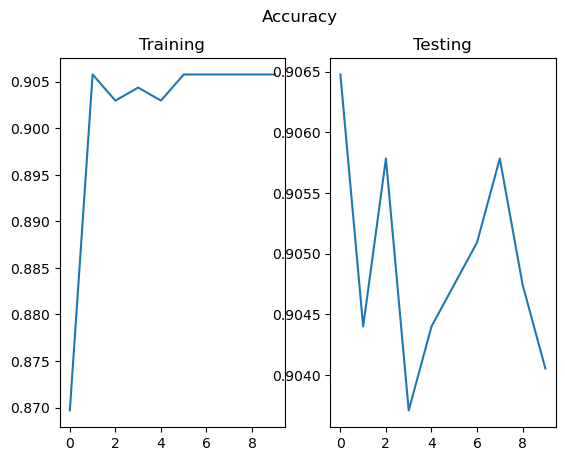

In [51]:
fig = plt.figure()
fig.suptitle("Accuracy")
ax = fig.subplots(1, 2)
ax[0].plot(training_acc)
ax[0].title.set_text("Training")
ax[1].plot(testing_acc)
ax[1].title.set_text("Testing")

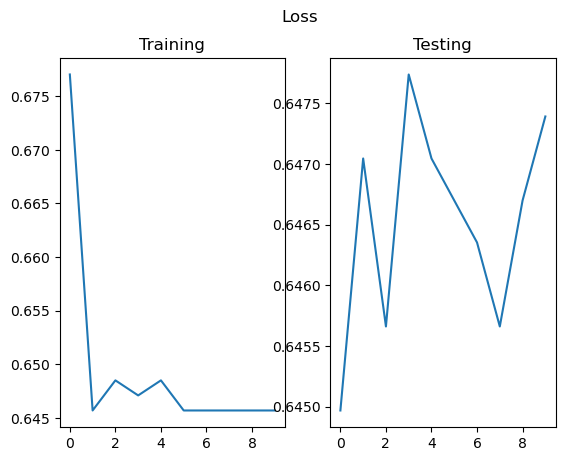

In [52]:
fig = plt.figure()
fig.suptitle("Loss")
ax = fig.subplots(1, 2)
ax[0].plot(training_loss)
ax[0].title.set_text("Training")
ax[1].plot(testing_loss)
ax[1].title.set_text("Testing")

In [53]:
# save model
now = datetime.now()
now = now.strftime("%Y%m%d_%H%M%S")
model_filename = f"../models/aisf/void_{now}.pth"
torch.save(model.state_dict(), model_filename)
print(f"Trained void model saved at {model_filename}")

Trained void model saved at ../models/aisf/void_20230517_115313.pth
